In [1]:
# **Fruits Recognition using CNN**

In [75]:
# Required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image

In [3]:
# **1. Load Dataset**

In [17]:
# Dataset path (download dataset from Kaggle and set the correct path)
DATASET_PATH = "/Users/nandagopalan/Downloads/archive/train/train"
CATEGORIES = os.listdir(DATASET_PATH)
print(f"Categories: {CATEGORIES}")

Categories: ['Blueberry', 'Pear', 'Strawberry', 'Avocado', 'Pomegranate', 'Pepper Red', 'Kiwi', 'Lemon', 'Raspberry', 'Plum', 'Cherry', 'Cucumber Ripe', 'Clementine', 'Watermelon', 'Cantaloupe', 'Apple Braeburn', 'Onion White', 'Mango', 'Potato Red', 'Passion Fruit', 'Apple Granny Smith', 'Apricot', 'Limes', 'Corn', 'Banana', 'Grape Blue', 'Cactus fruit', 'Papaya', 'Pineapple', 'Tomato', 'Orange', 'Pepper Green', 'Peach']


In [19]:
# Image size
IMG_SIZE = 100

In [21]:
# Function to preprocess and load images
def load_images(dataset_path, img_size):
    images = []
    labels = []
    for category in CATEGORIES:
        folder_path = os.path.join(dataset_path, category)
        label = CATEGORIES.index(category)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            try:
                img = Image.open(img_path).resize((img_size, img_size))
                img = np.array(img)
                images.append(img)
                labels.append(label)
            except:
                print(f"Error loading image: {img_path}")
    return np.array(images), np.array(labels)

In [23]:
# Load images and labels
images, labels = load_images(DATASET_PATH, IMG_SIZE)
print(f"Dataset size: {images.shape}, Labels size: {labels.shape}")

Dataset size: (16854, 100, 100, 3), Labels size: (16854,)


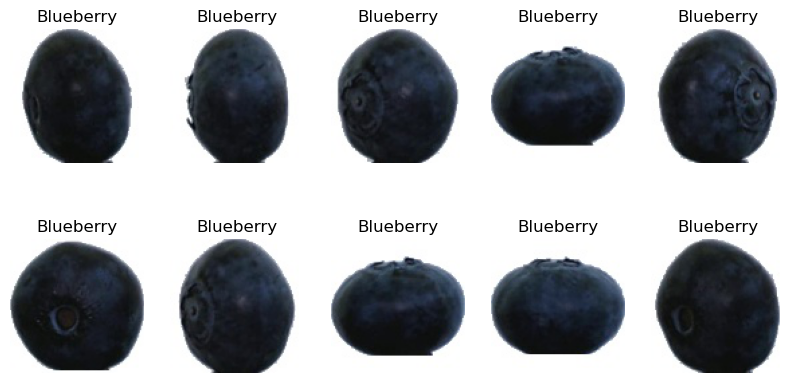

In [25]:
# Visualize some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.title(CATEGORIES[labels[i]])
    plt.axis('off')
plt.show()

In [27]:
# **2. Data Preprocessing**

In [29]:
# Normalize image data
images = images / 255.0

In [31]:
# Convert labels to categorical
labels = to_categorical(labels, num_classes=len(CATEGORIES))

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (11797, 100, 100, 3), Val: (2528, 100, 100, 3), Test: (2529, 100, 100, 3)


In [33]:
# **3. Model Development**

In [35]:
# CNN Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(CATEGORIES), activation='softmax')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 33)             │         4,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,357,345 (16.62 MB)

 Trainable params: 4,357,345 (16.62 MB)

 Non-trainable params: 0 (0.00 B)

None


In [39]:
# **4. Data Augmentation**

In [41]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [43]:
datagen.fit(X_train)

In [45]:
# **5. Training the Model**

In [47]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=20,
                    steps_per_epoch=len(X_train) // 32)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.2796 - loss: 2.5270 - val_accuracy: 0.9490 - val_loss: 0.2717
Epoch 2/20
  1/368 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.6562 - loss: 1.0770

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6562 - loss: 1.0770 - val_accuracy: 0.9577 - val_loss: 0.2666
Epoch 3/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.7534 - loss: 0.6919 - val_accuracy: 0.9755 - val_loss: 0.0898
Epoch 4/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7500 - loss: 0.5866 - val_accuracy: 0.9771 - val_loss: 0.0875
Epoch 5/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 35s 94ms/step - accuracy: 0.8645 - loss: 0.3839 - val_accuracy: 0.9917 - val_loss: 0.0430
Epoch 6/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8750 - loss: 0.2757 - val_accuracy: 0.9933 - val_loss: 0.0405
Epoch 7/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 36s 97ms/step - accuracy: 0.8937 - loss: 0.3020 - val_accuracy: 0.9877 - val_loss: 0.0573
Epoch 8/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9688 - loss: 0.0971 - val_accuracy: 0.9834 - val_loss: 0.0670
Epoch 9/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 36s 99ms/step - accuracy: 0.9052 - loss: 0.2644 - val_accuracy: 0.997

In [59]:
# # Save the trained model as a pickle file
# with open('fruits_recognition_model.pkl', 'wb') as model_file:
#     pickle.dump(model, model_file)

# print("Model saved as fruits_recognition_model.pkl")

In [53]:
# **6. Evaluation**

In [55]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9974 - loss: 0.0097
Test Accuracy: 99.68%


In [57]:
# Classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=CATEGORIES))


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
                    precision    recall  f1-score   support

         Blueberry       1.00      1.00      1.00        67
              Pear       1.00      1.00      1.00        97
        Strawberry       1.00      1.00      1.00        79
           Avocado       1.00      1.00      1.00        57
       Pomegranate       1.00      1.00      1.00        75
        Pepper Red       1.00      1.00      1.00       101
              Kiwi       1.00      1.00      1.00        62
             Lemon       1.00      1.00      1.00        95
         Raspberry       1.00      1.00      1.00        67
              Plum       1.00      1.00      1.00        68
            Cherry       1.00      1.00      1.00        88
     Cucumber Ripe       1.00      1.00      1.00        47
        Clementine       1.00      1.00      1.00        95
        Watermelon       1.00      1.00      1.00        67
        Cantaloupe       1.00      1.00      1.00        50

In [63]:
# **7. Visualization**

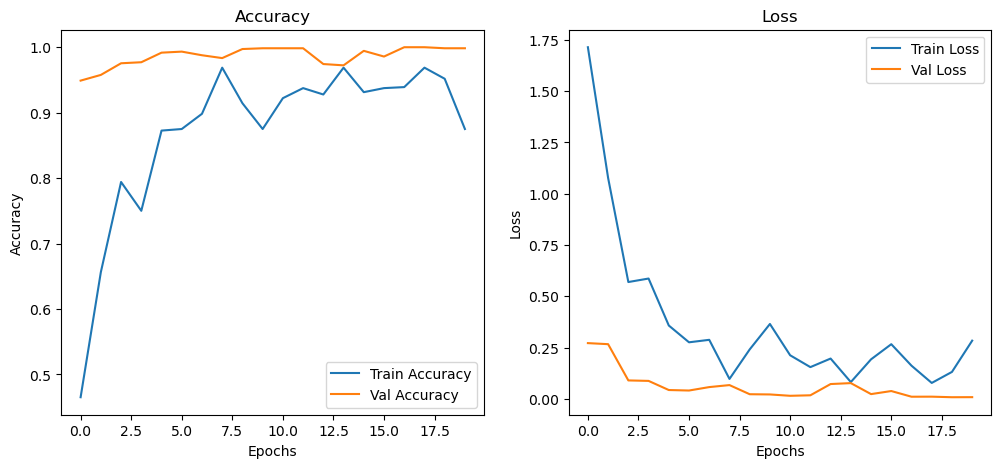

In [65]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [67]:
# **8. Save Model**

model.save("fruits_recognition_model.h5")
print("Model saved!")

Model saved!


In [69]:
# **9. Test with a Single Image**

In [73]:
def predict_single_image(image_path, model, img_size):
    img = Image.open(image_path).resize((img_size, img_size))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, img_size, img_size, 3)
    prediction = np.argmax(model.predict(img_array), axis=1)[0]
    return CATEGORIES[prediction]

# Test example
test_image_path = "/Users/nandagopalan/Downloads/archive/test/test/2172.jpg"
predicted_fruit = predict_single_image(test_image_path, model, IMG_SIZE)
print(f"Predicted Fruit: {predicted_fruit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Fruit: Watermelon
